In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import *
from astropy.table import Table, Column
from scipy.optimize import curve_fit
from IPython.display import display, Math, Latex
import scipy.special
from scipy.stats import norm


In [3]:
from IPython.html.widgets import interact, interactive, fixed
from IPython.html import widgets
from IPython.display import display, display_png, display_svg, clear_output
from IPython.core.pylabtools import print_figure

:0: FutureWarning: IPython widgets are experimental and may change in the future.


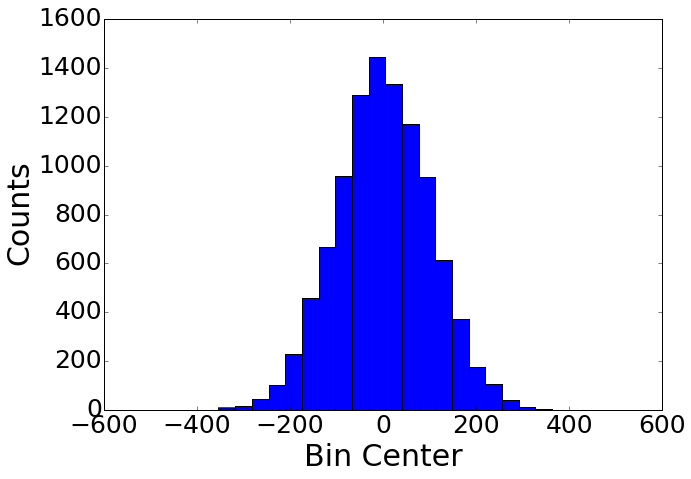

In [28]:
@interact(x_0 =(-80,80,0.1),
          l = (200, 900, 1),
          M = (10,100,10),
          NA = (0.5, 2.0, 0.1),
          NoiseCenter = u'0',
          NoiseWidth = u'100')
def plot_NormDist(NoiseCenter = 0, NoiseWidth = 100):
    
    NoiseCenter = np.float(NoiseCenter)
    NoiseWidth = np.float(NoiseWidth)

    noise = np.random.normal(loc=NoiseCenter,scale=NoiseWidth,size=10000)
    plt.figure(figsize=(10,7))
    matplotlib.rc('xtick', labelsize=25) 
    matplotlib.rc('ytick', labelsize=25)
    xlabel('Bin Center', fontsize=30)
    ylabel('Counts', fontsize=30)
    xlim([-600,600])
    hist(noise,20)
    



Probability
0.341344746069



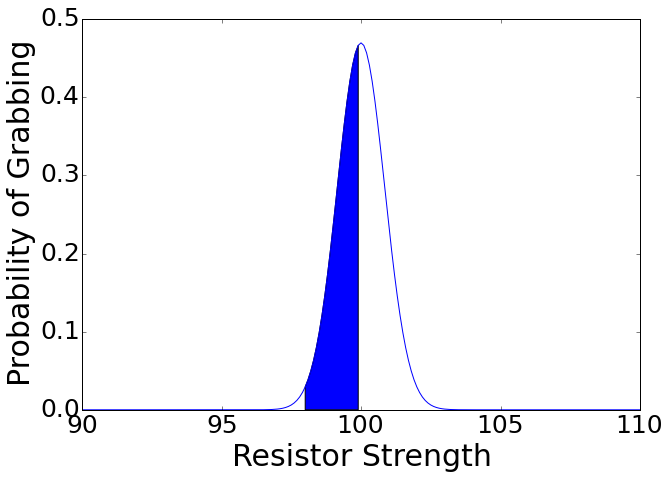

In [36]:
#@interact(Center = (0, 200, 5), Spread = (0, 50, 1), Cutoff1 = (90,110,0.1), Cutoff2 = (90,110,0.1))
#def plot_NormDist(Center = 100, Spread = 2, Cutoff1 = 98, Cutoff2 = 100):

@interact(Center = u'100', Spread =u'2', Cutoff1 =u'98', Cutoff2 =u'100')
def plot_NormDist(Center = 100, Spread = 2, Cutoff1 = 98, Cutoff2 = 100):
    
    step = 0.1
    xdata = arange(80,120,step)
    
    #Center = 100.0
    #Cutoff1 = 100.0   # Must be less than Cutoff2 to work!
    #Cutoff2 = 103.0  # Must be greater than Cutoff1 to work!
    #Spread = 2.0
    Cutoff2 = np.float(Cutoff2)
    Cutoff1 = np.float(Cutoff1)
    Spread = np.float(Spread)
    Center = np.float(Center)
    percent = norm.cdf(Cutoff2,Center,Spread)-norm.cdf(Cutoff1,Center,Spread)
    Sigma = Spread/(2*sqrt(2*math.log(2)))
    fillfactorx = arange(Cutoff1,Cutoff2,step)
    fillfactory = (1/(sqrt(2*math.pi)*Sigma))*np.exp(-(fillfactorx-Center)**2/(2*Sigma**2))
    
    NormalDistribution = (1/(sqrt(2*math.pi)*Sigma))*np.exp(-(xdata-Center)**2/(2*Sigma**2))
    
    plt.figure(figsize=(10,7))
    matplotlib.rc('xtick', labelsize=25) 
    matplotlib.rc('ytick', labelsize=25)
    xlabel('Resistor Strength', fontsize=30)
    ylabel('Probability of Grabbing', fontsize=30)
    xlim([90,110])
    
    plot(xdata,NormalDistribution)
    fill_between(fillfactorx, 0, fillfactory)
    
    print('')
    print('Probability')
    print(percent)
    print('')
